# PreProcessing: Feature Selection

Feature Selection is an important step in data pre-processing. It consists in selecting the best subset of input variable as the most pertinent. Discarding irrelevant data is essential before applying Machine Learning algorithm in order to:
* *Reduce Overfitting*: less opportunity to make decisions based on noise;
* *Improve Accuracy*: less misleading data means modelling accuracy improves. Predictions can be greatly distorted by redundant attributes. 
* *Reduce Training Time*: With less data the algorithms will train faster;




### Data import
Data are imported from .csv file, splitted in **train_set** and **test_set** which are used by supervised algorithm. Otherwise with unsupervised algorithm the entire dataset will be processed. 

In [29]:
from sklearn.model_selection import train_test_split
from mypackage import methods as m
import pandas as pd



data = pd.read_csv('table.csv')

labels =  ['pop','h_mean', 'dsf3', 'strade_pri', 'strade_sec']
langs = ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5']

temp= ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']
X  = pd.DataFrame(data, columns = labels)
X1 = pd.DataFrame(data, columns = langs)
Y = pd.DataFrame(data, columns= ['mov_tot']) #'mov_tot' - 'FBpop_tot'
Y = Y.values.ravel()
X_stand = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

lat = pd.DataFrame(data, columns= ['lat'])
lat = lat['lat'].tolist()

lon = pd.DataFrame(data, columns= ['lon'])
lon = lon['lon'].tolist()


coords = list(zip(lat, lon))

Due to the fact there isn’t a best feature selection technique, many different methods are performed. The aim of this part is to discover by experimentation which one/ones work better for this specific problem. 
In this study, I choose supervised methods, which are classified into 3 groups, based on their  different approach.


## Filter Methods
Filter-based feature selection methods adopt statistical measures to evaluate the correlation/dependence between input variables.
These select features from the without machine learning algorithm. In terms of computation, they are very fast and are very suitable in order to remove duplicated, correlated, redundant variables. On the contrary,  these methods do not remove multicollinearity. 


### Pearson correlation index
It's a measure of linear correlation which stands for the ratio between the covariance of two variables and the product of their standard deviations. The algorithm evaluate the index for each feature variable.

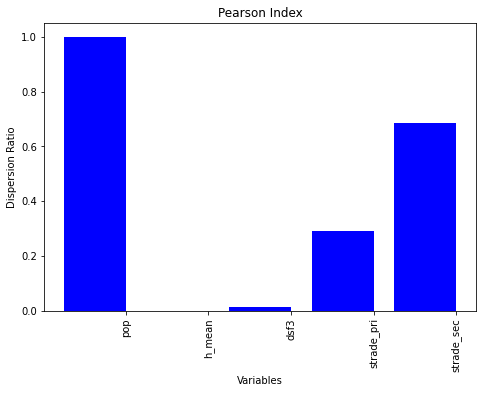

In [30]:
m.pearson(X, Y, labels)

### Spearmanr correlation coefficient
The Spearman correlation coefficient is a measure of the monotonicity of the relationship between two datasets.
The algorithm evaluate the index for each feature variable. 



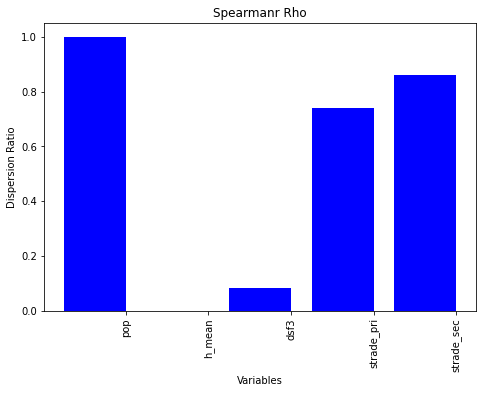

In [31]:
m.spearmanr(X, Y, labels)

### Kendall tau
As the Spearmanr correlation coefficient, is based on the ranks of data.
In most of the situations, the interpretations of Kendall’s tau and Spearman’s rank correlation coefficient are very similar and thus invariably lead to the same inferences.
The algorithm evaluate the index for each feature variable. 


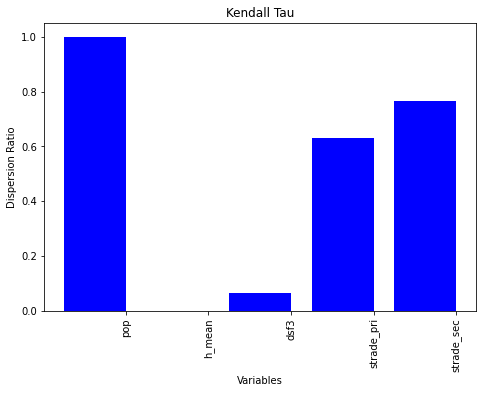

In [32]:
m.kendall(X, Y, labels)


### Chi-square test not allowed with no categorical input
A chi-square test is used to test events independence. In feature selection instead, we aim to select the features which are more highly dependent. Even if is more suitable for categorical input, computation is performed by casting features values as *Int values*. 

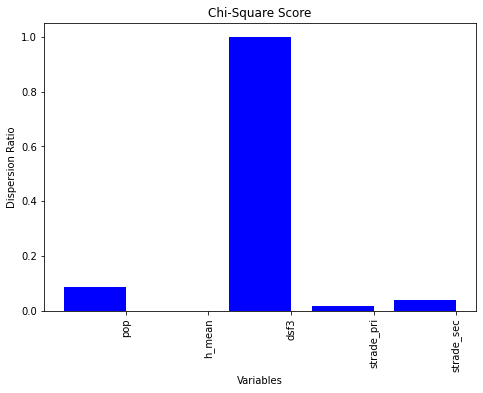

In [33]:
m.chi2_test(X_train, y_train, X_test, labels)

### F-Test
It's a statistical test used to compare model from X and Y and check if the difference is significant between them through regression. The algorithm evaluate the Fisher score for each feature variable. 

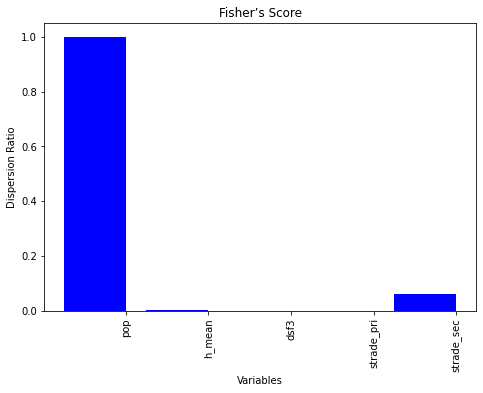

In [34]:
m.f_test(X_train, y_train, X_test, labels)

### Dispersion Ratio (Unsupervised)
It stands for the ratio between arithmetic mean the geometric mean. This is very usefull to check dispersion on data. Higher dispersion implies a higher value of this coefficent, thus a more relevant variable.

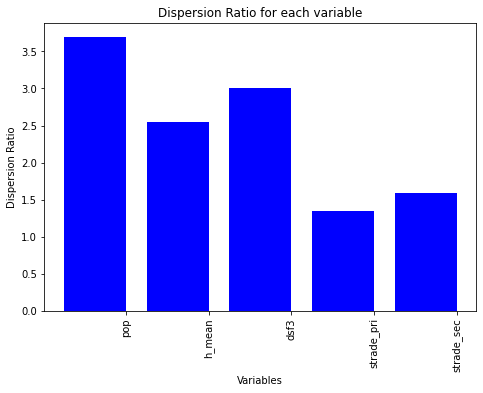

pop :  3.696779482494393
h_mean :  2.5542761802424105
dsf3 :  3.0064792805664164
strade_pri :  1.3522066189992477
strade_sec :  1.5934719330784206


In [35]:
m.compute_dispersion_ratio(X, labels)

### Variance Threshold (Unsupervised)
It's an approach which aims to remove all features which variance doesn’t meet some threshold. Usually it removes all zero-variance features, so variables taht contains useless information.


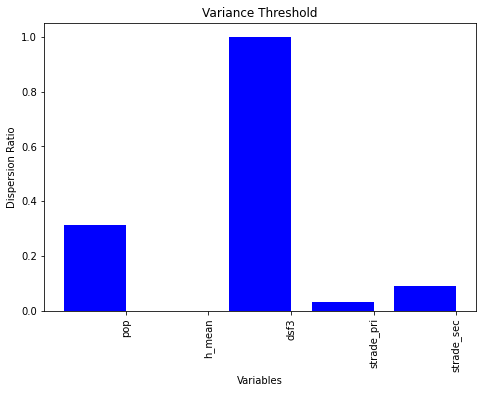

In [36]:
m.variance_threshold(X, labels)

## Wrapper Methods (and Embedded)
Wrapper methods, as the name suggests, wrap a machine learning model, with different subsets of input features: In this way the subsets are  evaluated following  the best model performance.
Embedded methods instead are characterised by the benefits of both the wrapper and filter methods, by including interactions of features but also having a reasonable computational cost.


### Exhaustive feature selection for regression analysis
This algorithm follow the exhaustive feature selection approach with brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified metric given an arbitrary regressor or classifier. In this case a transformer is used to perform the Sequential Feature Selection. 
The final outputs are:
* Accuracy for the subset choosen;
* Indices of the choosen features;
* Corresponding names of the features choosen;



In [37]:
m.exhaustive_feature_selection(X_train, y_train, labels)

Features: 25/25

Best accuracy score: 0.94
Best subset (indices): (0, 1, 2, 4)
Best subset (corresponding names):
pop
h_mean
dsf3
strade_sec


### Random Forest importance
It uses a forest of trees to evaluate the importance of each features as outputs.

pop :  1.00000
h_mean :  0.00968
dsf3 :  0.00521
strade_pri :  0.01767
strade_sec :  0.00000


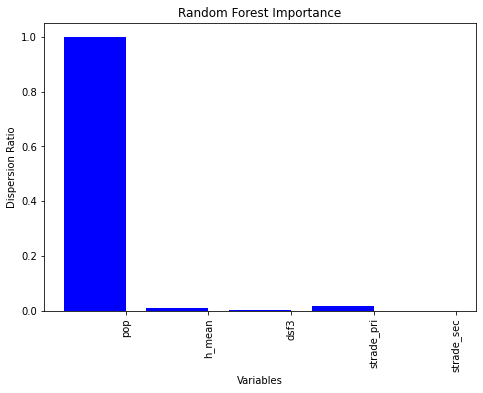

In [38]:
m.RF_importance(X_train, y_train, labels)

### Recursive Feature Selection
The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
The final output for each variable will be:
* *Label*;
* A *boolean expressing* whetever is selected or not;
* *Ranking value* based on its score;

In [39]:
m.recursive_feature_selection(X_train, y_train.astype(int), labels, 5)

Label: pop, Selected=True, Rank: 1
Label: h_mean, Selected=True, Rank: 1
Label: dsf3, Selected=True, Rank: 1
Label: strade_pri, Selected=True, Rank: 1
Label: strade_sec, Selected=True, Rank: 1


## Multiscale Geographically Weighted Regression
Due to the fact that this study is related to geographic and spatial data, each pieces of data is very sensitive to the geographic distance between them. So the use of mgwr methods could be innovative, since multivariate models are increasingly encountered in geographical research to estimate spatially varying relationships between a targets and its predictive variables.




In [ ]:
m.mgwr(data, labels)

5
bw: 64.0


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]